In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2020-05-12 10:00:49--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  5.92MB/s    in 50s     

2020-05-12 10:01:41 (6.11 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
import shutil
import math
from tqdm import tqdm

import tensorflow as tf

In [0]:
loc_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(loc_zip, 'r')
zip_ref.extractall('Dataset/')
zip_ref.close()

dataset_dir = 'Dataset/rockpaperscissors/rps-cv-images'
rock_dir = 'Dataset/rockpaperscissors/rps-cv-images/rock'
paper_dir ='Dataset/rockpaperscissors/rps-cv-images/paper'
scissors_dir ='Dataset/rockpaperscissors/rps-cv-images/scissors'


In [0]:
file_txt = 'Dataset/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt'
os.remove(file_txt)

In [5]:
kelas = os.listdir(dataset_dir)
print(kelas)
data_kelas = np.array(kelas)
print(data_kelas)

['scissors', 'paper', 'rock']
['scissors' 'paper' 'rock']


In [0]:
import cv2
X=[]
Z=[]
lebar_gambar = 300
tinggi_gambar = 200

In [0]:
def label_gambar(img, gaya_suit):
  return gaya_suit

In [0]:
def data_training(gaya_suit, DIR):
  for img in tqdm(os.listdir(DIR)):
    label=label_gambar(img,gaya_suit)
    path = os.path.join(DIR,img)
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    img = cv2.resize(img, (lebar_gambar, tinggi_gambar))
        
    X.append(np.array(img))
    Z.append(str(label))

In [9]:
data_training('rock',rock_dir)
print(len(X))

100%|██████████| 726/726 [00:01<00:00, 483.10it/s]

726


In [10]:
data_training('paper',paper_dir)
print(len(X))

100%|██████████| 712/712 [00:01<00:00, 507.06it/s]

1438


In [11]:
data_training('scissors',scissors_dir)
print(len(X))

100%|██████████| 750/750 [00:01<00:00, 514.12it/s]

2188


In [12]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,3)
X=np.array(X)
X=X/255

Using TensorFlow backend.


In [0]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [0]:
from keras.callbacks import ReduceLROnPlateau

red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1)

In [0]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.05,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [149]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(200,300,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_141 (Conv2D)          (None, 198, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_134 (MaxPoolin (None, 99, 149, 64)       0         
_________________________________________________________________
conv2d_142 (Conv2D)          (None, 97, 147, 64)       36928     
_________________________________________________________________
max_pooling2d_135 (MaxPoolin (None, 48, 73, 64)        0         
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 46, 71, 32)        18464     
_________________________________________________________________
max_pooling2d_136 (MaxPoolin (None, 23, 35, 32)        0         
_________________________________________________________________
conv2d_144 (Conv2D)          (None, 21, 33, 32)      

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    zoom_range = 0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip = True)

datagen.fit(x_train)

In [152]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), 
                    steps_per_epoch=len(x_train)/32, validation_data=(x_test,y_test),epochs=5,
                    verbose=1,callbacks=[red_lr, early_stop])


Epoch 1/5
55/54 [==============================] - 141s 3s/step - loss: 0.9818 - accuracy: 0.4777 - val_loss: 0.9631 - val_accuracy: 0.4247
Epoch 2/5
55/54 [==============================] - 136s 2s/step - loss: 0.5233 - accuracy: 0.7891 - val_loss: 0.6958 - val_accuracy: 0.7877
Epoch 3/5
55/54 [==============================] - 136s 2s/step - loss: 0.3128 - accuracy: 0.8897 - val_loss: 0.6354 - val_accuracy: 0.7260
Epoch 4/5
55/54 [==============================] - 136s 2s/step - loss: 0.3180 - accuracy: 0.8886 - val_loss: 0.6084 - val_accuracy: 0.9269
Epoch 5/5
55/54 [==============================] - 136s 2s/step - loss: 0.2865 - accuracy: 0.8983 - val_loss: 0.5359 - val_accuracy: 0.9475


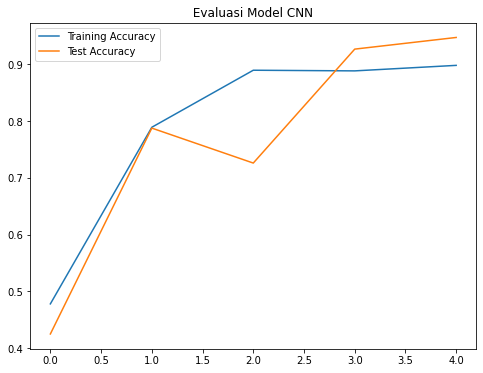

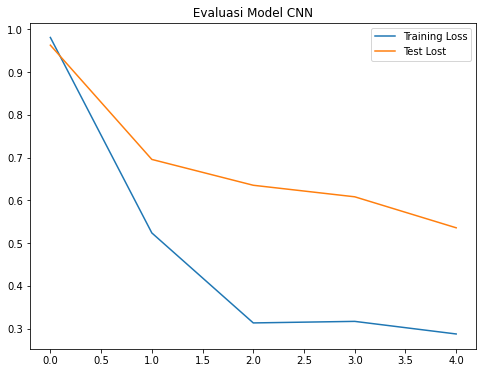

In [153]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title(" Evaluasi Model CNN ")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Lost')
plt.title(" Evaluasi Model CNN ")
plt.legend()
plt.show()

In [164]:
from google.colab import files
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

uploaded = files.upload()
for path in uploaded.keys():
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  test_image = image.img_to_array(img)
  test_image = test_image[np.newaxis,:,:,:]
  hasil = model.predict(test_image)

print(hasil)
if hasil[0][0]==1:
  print("Hasil Prediksi : PAPER")
if hasil[0][1]==1:
  print("Hasil Prediksi : ROCK")
if hasil[0][2]==1:
  print("Hasil Prediksi : SCISSOR")

[[0. 0. 1.]]
Hasil Prediksi : SCISSOR
